In [57]:
import skimage.io as io 
import matplotlib.pyplot as plt
import skimage as sk
import skimage.color as clr
import matplotlib as mat
import numpy as np
import scipy as sc
import glob
from skimage.filters import try_all_threshold

nombre d'images 8


<function list.clear()>

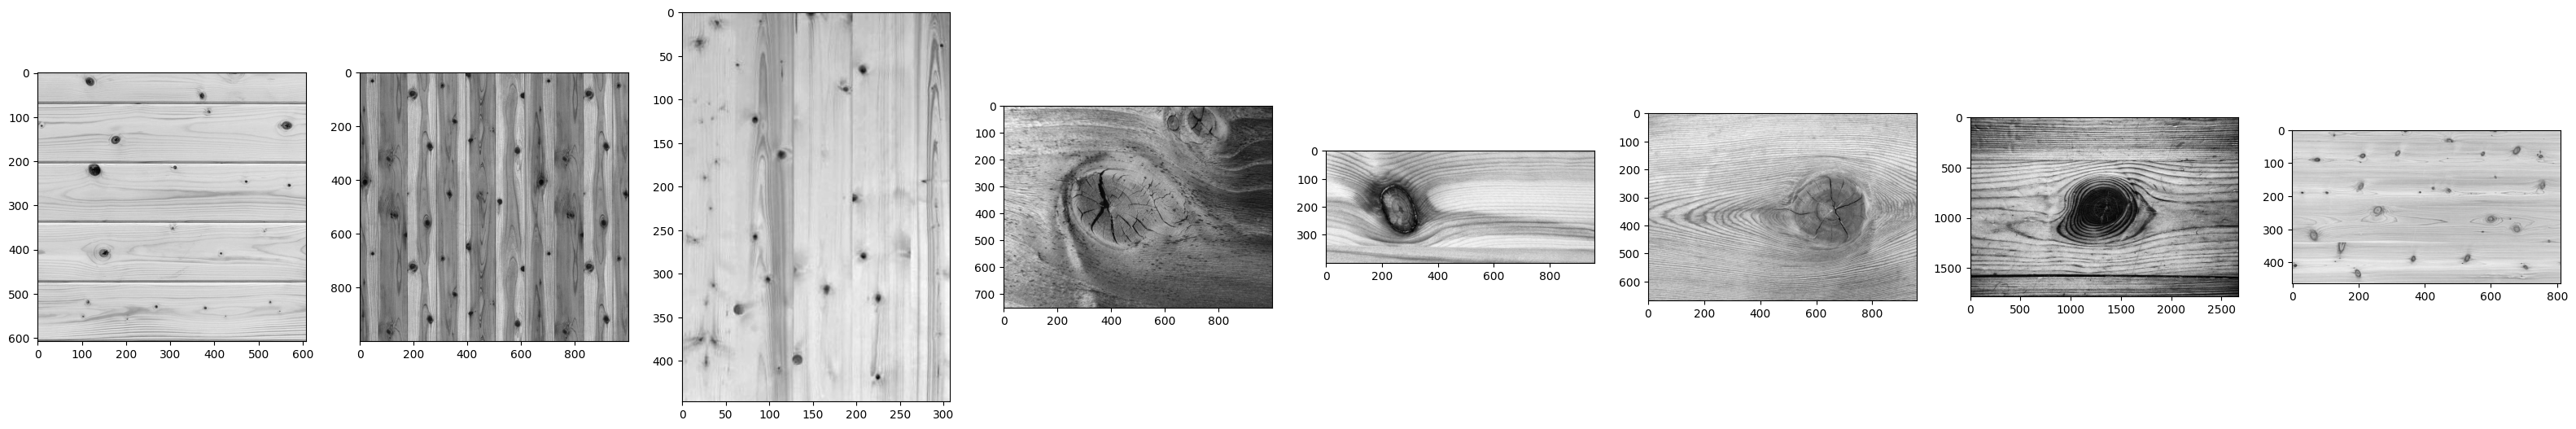

In [58]:
data = glob.glob('dataset/*.jpg')

data_size = len(data)
data_gray = [None] * data_size
data_threshold = [None] * data_size
data_fill = [None] * data_size

print("nombre d'images",data_size)

fig, ax = plt.subplots(1, data_size,figsize = (40,40))

for i in range(data_size):
    data_gray[i] = clr.rgb2gray(io.imread(data[i]))
    ax[i].imshow((data_gray[i]),cmap = 'gray')
data.clear

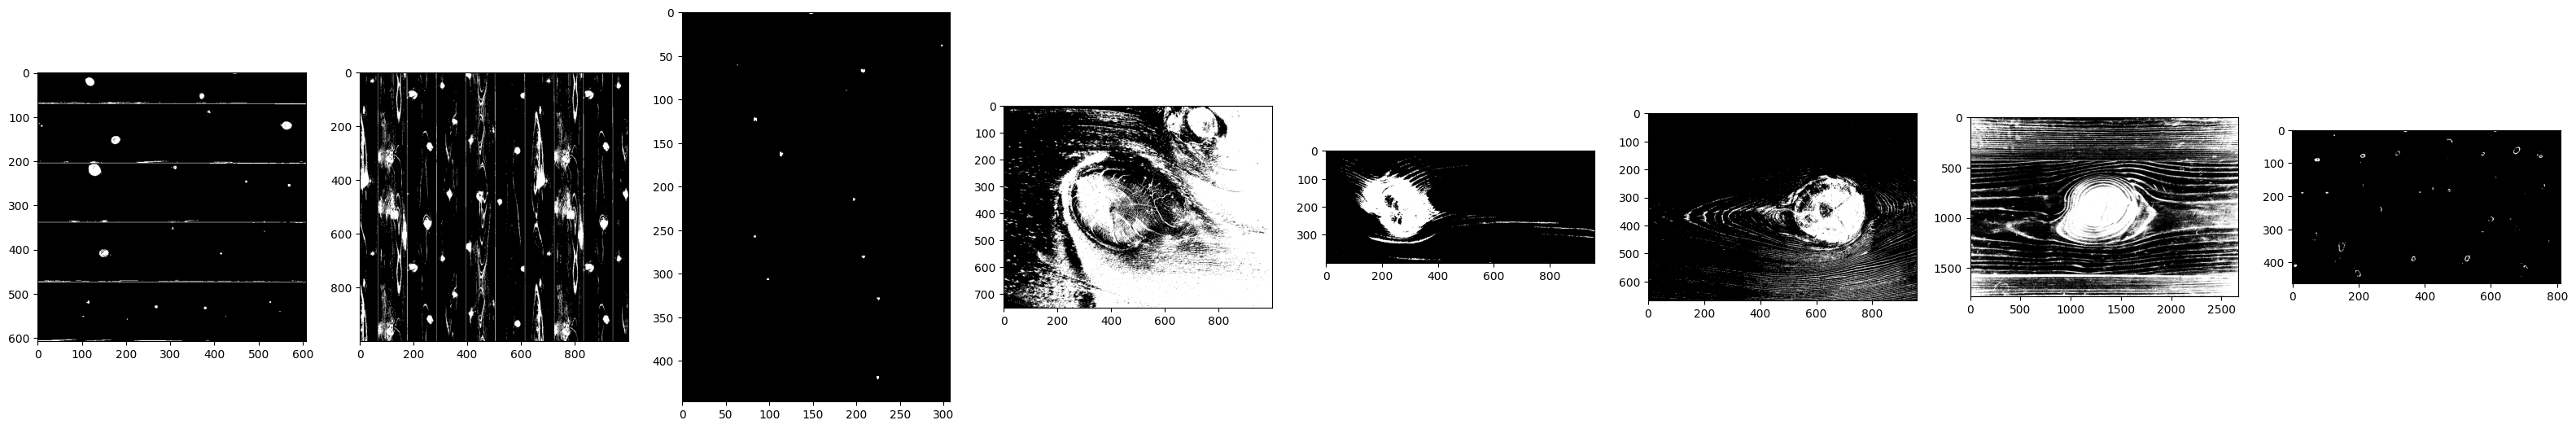

In [59]:
fig, ax = plt.subplots(1, data_size,figsize = (40,40))

for i in range(data_size):
    data_mean= np.max(data_gray[i])/2
    data_threshold[i] = data_gray[i] < data_mean
    ax[i].imshow((data_threshold[i]),cmap = 'gray')
    


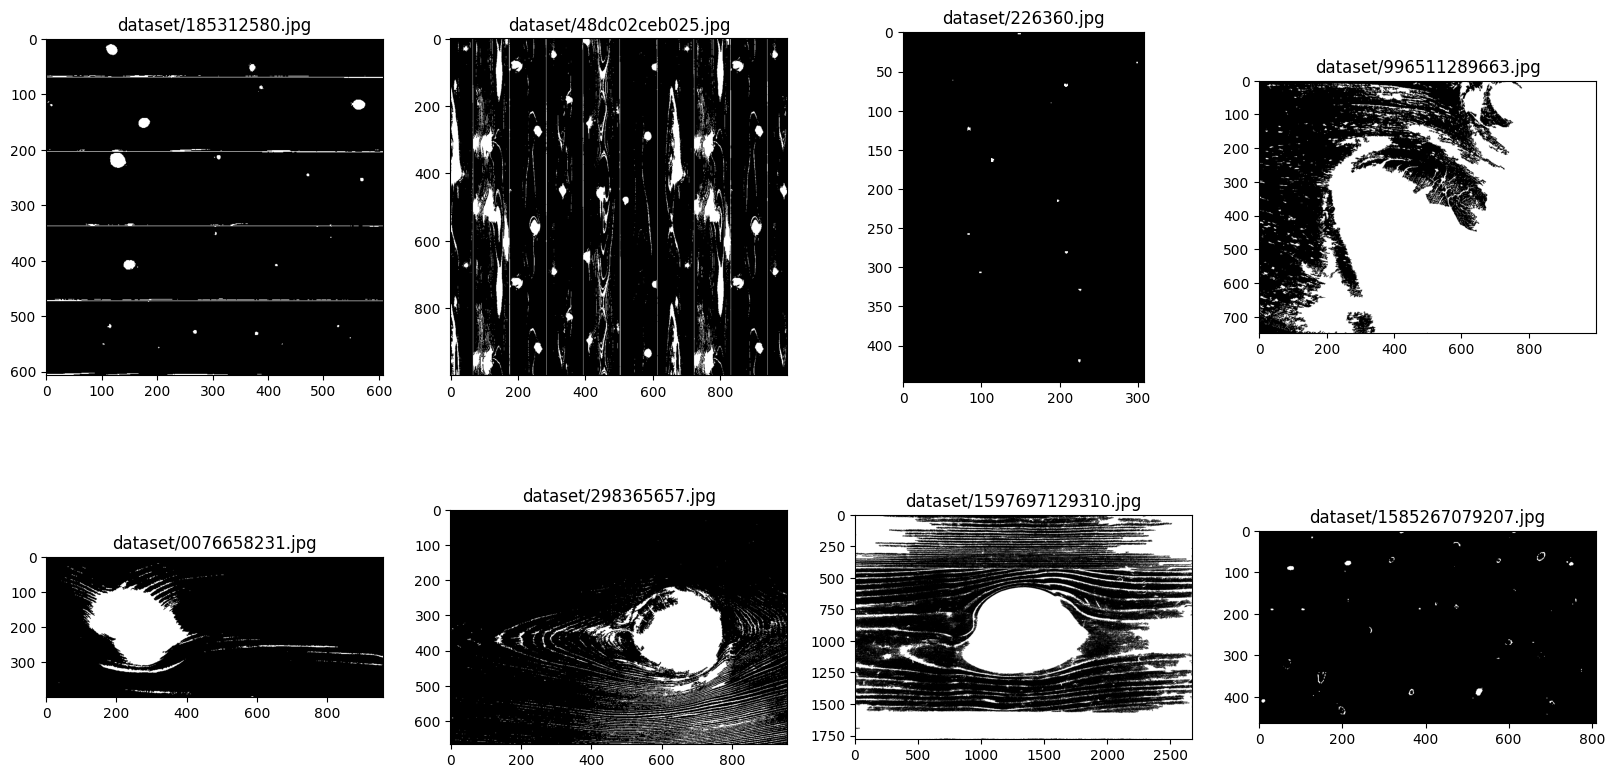

In [60]:
fig, ax = plt.subplots(2, 4,figsize = (20,10))

for i in range(data_size):
    data_fill[i] = sc.ndimage.binary_fill_holes(data_threshold[i])
    ax.flatten()[i].imshow((data_fill[i]),cmap = 'gray')
    ax.flatten()[i].set_title((data[i]))